# Music Genres Classification

## Features

* filename
* chroma_stft
* rmse
* spectral_centroid
* spectral_bandwidth
* rolloff
* zero_crossing_rate
* mfcc

## On the subject :
* Bressan and Azevedo, 2018, A COMPARISON OF CLASSIFIERS FOR MUSICAL GENRES CLASSIFICATION AND MUSIC EMOTION RECOGNITION

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score # 2*(P*R)/(P+R)
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   chroma_stft         1000 non-null   float64
 2   rmse                1000 non-null   float64
 3   spectral_centroid   1000 non-null   float64
 4   spectral_bandwidth  1000 non-null   float64
 5   rolloff             1000 non-null   float64
 6   zero_crossing_rate  1000 non-null   float64
 7   mfcc1               1000 non-null   float64
 8   mfcc2               1000 non-null   float64
 9   mfcc3               1000 non-null   float64
 10  mfcc4               1000 non-null   float64
 11  mfcc5               1000 non-null   float64
 12  mfcc6               1000 non-null   float64
 13  mfcc7               1000 non-null   float64
 14  mfcc8               1000 non-null   float64
 15  mfcc9               1000 non-null   float64
 16  mfcc10 

In [5]:
genres = df.iloc[:,27].copy()
genres.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [6]:
data = df.iloc[:,1:27].copy()
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,...,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,...,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, genres, test_size=0.2, random_state=42, stratify=genres)

In [8]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_tree = tree.predict(X_test)
f1_tree = f1_score(y_test, y_tree, average='macro')

f1_tree

0.4653310404157863

In [9]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_knn = knn.predict(X_test)
f1_knn = f1_score(y_test, y_knn, average='macro')

f1_knn

0.3646283291289103

In [10]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_rf = rf.predict(X_test)
f1_rf = f1_score(y_test, y_rf, average='macro')

f1_rf

0.6365400663468888

In [11]:
bag = BaggingClassifier().fit(X_train, y_train)
y_bag = bag.predict(X_test)
f1_bag = f1_score(y_test, y_bag, average='macro')

f1_bag

0.5372274163328029

In [29]:
scores = [('KNN', f1_knn), ('DecisionTree', f1_tree), ('RandomForest', f1_rf), ('Bagging', f1_bag)]
comp = pd.DataFrame(data = scores, columns=['Model', 'Score'])
comp

,Model,Score
0,KNN,0.364628
1,DecisionTree,0.465331
2,RandomForest,0.636540
3,Bagging,0.537227


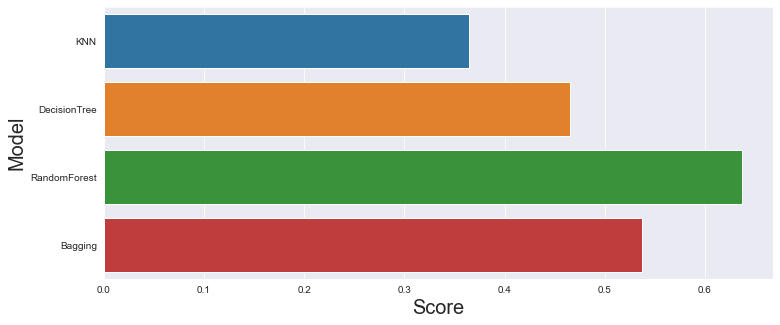

In [31]:
# predict = pd.DataFrame(data = scores, columns=['Model', 'Score'])

f, axe = plt.subplots(1,1, figsize=(12,5))
sns.barplot(y='Model', x='Score', data=comp, ax = axe)
axe.set_ylabel('Model', size=20)
axe.set_xlabel('Score', size=20)

plt.show()